In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import xarray as xr
import fsspec

In [3]:
metadata = pd.read_feather('data\\metadata.fea')
time_series = pd.read_feather('data\\timeseries.fea')
time_series_smoothed = pd.read_feather('data\\timeseries_smoothed.fea')

In [47]:
time_series_smoothed.isna().values.any()

False

In [18]:
with fsspec.open('data\\passiv.netcdf', mode="rb") as file:
    dataset = xr.load_dataset(file, engine="h5netcdf")
df = dataset.to_dataframe()

In [41]:
collist = time_series.columns.tolist()
collist = collist[1:]

In [45]:
time_series_smoothed = time_series_smoothed.dropna(axis=1, how='all')

In [12]:
time_series[collist] = time_series[collist].interpolate(method ='linear', limit_direction ='backward', limit = 1000000)

In [28]:
df_max_scaled = df.copy()

In [29]:
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

In [37]:
start = datetime.time(8,00,00)

TypeError: descriptor 'time' for 'datetime.datetime' objects doesn't apply to a 'int' object

In [42]:
df['time'] = df.datetime.apply(lambda x: x.time())

In [48]:
start = datetime.strptime("08:00:00", "%H:%M:%S").time()
end = datetime.strptime("20:00:00", "%H:%M:%S").time()

In [49]:

mask = (df.time<end) & (df.time>=start)
df = df.loc[mask]

In [63]:
df

,datetime,10003,10004,10005,10048,10049,10063,10064,10082,10086,...,9816,9865,9866,9867,9870,9871,9902,9903,9960,9989
0,2018-01-01 08:00:00,0.0,0.000000,0.027119,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
1,2018-01-01 08:05:00,0.0,0.000000,0.027119,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0.0,4.579163e-15,1.046028e-10,1.083477e-14,0.0,0.000000,0.000000
2,2018-01-01 08:10:00,0.0,0.000000,0.027119,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000e+00,0.0,4.910015e-14,1.335482e-09,1.614890e-13,0.0,0.000000,0.000000
3,2018-01-01 08:15:00,0.0,0.000000,0.027119,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,2.680731e-08,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
4,2018-01-01 08:20:00,0.0,0.000000,0.027119,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,2.522597e-07,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200180,2021-10-27 19:35:00,0.0,0.139446,0.015998,0.0,0.004308,0.0,0.0,0.0,0.0,...,0.0,0.0,3.303762e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.562216,0.094843
200181,2021-10-27 19:40:00,0.0,0.139446,0.015998,0.0,0.004308,0.0,0.0,0.0,0.0,...,0.0,0.0,3.303762e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.562216,0.094843
200182,2021-10-27 19:45:00,0.0,0.139446,0.015998,0.0,0.004308,0.0,0.0,0.0,0.0,...,0.0,0.0,3.303762e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.562216,0.094843
200183,2021-10-27 19:50:00,0.0,0.139446,0.015998,0.0,0.004308,0.0,0.0,0.0,0.0,...,0.0,0.0,3.303762e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.562216,0.094843


In [64]:
df.to_feather('timeseries.fea')

In [65]:
collist = df.columns.tolist()
collist = collist[1:]

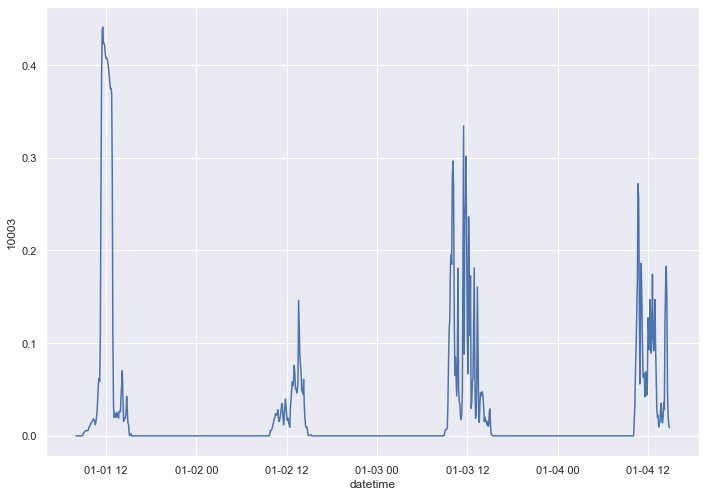

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(
    x='datetime',
    y='10003',
    data= time_series[0:1000])
plt.show()

In [66]:
smoothed = df.copy()

In [67]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [68]:
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

In [69]:
smoothed[collist] = butter_bandpass_filter(df[collist], lowcut, highcut, fs, order=6)

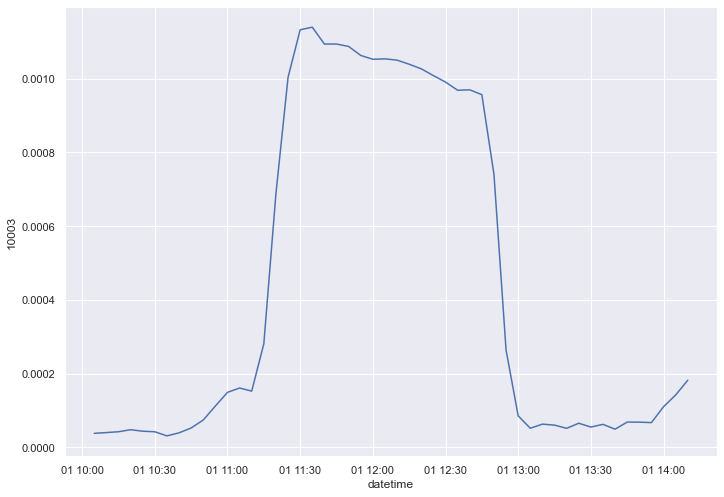

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(
    x='datetime',
    y='10003',
    data=smoothed[25:75])
plt.show()

In [48]:
time_series_smoothed.to_feather('timeseries_smoothed.fea')